interactive(children=(IntSlider(value=3, description='v1_x', max=6, min=-6), IntSlider(value=4, description='v…

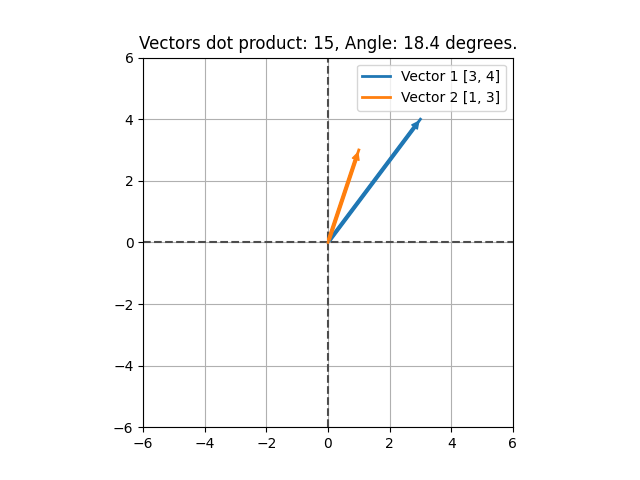

In [3]:
%matplotlib widget

import numpy as np
from math import acos, pi
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets

    
vector_1 = [3,4]
vector_2 = [1,3]


def vector_angle(vector1, vector2):
    """Compute the angle between the two vectors"""
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    
    # Prevent divide by zero
    if norm1 == 0 or norm2 == 0:
        return 0
    
    # From the formula for angle between vectors, c.f.
    # https://www.cuemath.com/geometry/angle-between-vectors/
    cos_of_angle = np.dot(vector1, vector2) / (norm1 * norm2)
    
    # Make sure the cosine is in range -1 <= cos(angle) <= 1 
    if cos_of_angle > 1:
        cos_of_angle = 1
    elif cos_of_angle < -1:
        cos_of_angle = -1
    
    radians = acos(cos_of_angle)
    return round(radians * 180/pi, 1)

def get_title(vector1, vector2):
    return f"Vectors dot product: {np.dot(vector1, vector2)}, Angle: {vector_angle(vector1, vector2)} degrees."

def get_label(which_vector, vector):
    """Labels a vector with its name and vector head coordinates"""
    return f"{which_vector} {vector}"

def plot_line(vector, label):    
    """Plots a vector in standard position"""
    line = plt.plot([0,vector[0]], [0, vector[1]], label=label, lw=2)[0]
      # Draw as an arrow, as vectors are generally drawn    
    line.axes.annotate('',
        xytext=(0, 0),
        xy=(vector[0], vector[1]),       
        arrowprops=dict(color=line.get_color(), arrowstyle="simple"),
        size=10
    )
    
    return line

def configure_graph_grid():
    """Set up a square grid axis"""
    
    # Size
    grid_min = -6
    grid_max = 6
    
    # Make it square and set limits
    plt.axis('square')
    plt.axis(( grid_min, grid_max, grid_min, grid_max))
    
    # Plot x and y axes
    plt.plot([grid_min, grid_max], [0,0], linestyle="--", color=".3")
    plt.plot([0,0],[grid_min, grid_max], linestyle="--", color=".3")
    plt.grid()
    

def do_update(v1, v2):
    """Based on the new control state, update the interactive plot.
    
       The approach here is to clear and redraw the whole plot rather than simply to update 
       the lines. Simply setting new x and y data for the lines works in the line case, but 
       doesn't because we're drawing them as arrows.
       
    """ 
    
    figure.clf()
    configure_graph_grid()
    line_1 = plot_line(v1, get_label("Vector 1", v1))
    line_2 = plot_line(v2, get_label("Vector 2", v2))
    plt.legend()
    plt.title(get_title(v1, v2))
    plt.draw()


def handle_event(v1_x, v1_y, v2_x, v2_y):
    """Process events from the ipywidgets.interactive handler.
       
       Argument names in the event handler must match the keys in the "interactive" call (below).       
    """
    
    # Repack the x and y coordinates into two vectors, and call do_update to process the change.
    vector1 = [v1_x, v1_y]
    vector2 = [v2_x, v2_y]
 
    do_update(vector1, vector2) 
    
def slider_config(value):
    """Return an IntSlider widget with the common configuration"""
    return widgets.IntSlider(min=-6, max=6, step=1, value=value)

                          

# Display the grid and the vectors
figure = plt.figure()                          

# configure_graph_grid()
# line_1 = plot_line(vector_1, get_label("Vector 1", vector_1))
# line_2 = plot_line(vector_2, get_label("Vector 2", vector_2))
# plt.legend()
# plt.title(get_title(vector_1, vector_2))
# plt.show()

do_update(vector_1, vector_2)

# Make the slider controls interactive, and display them
slider_controls = interactive(handle_event, 
                 v1_x=slider_config(vector_1[0]), 
                 v1_y=slider_config(vector_1[1]),
                 v2_x=slider_config(vector_2[0]), 
                 v2_y=slider_config(vector_2[1]))
slider_controls.layout.fig_margin=dict(top=0, bottom=80, left=0, right=20)
display(slider_controls)
